Business Understanding 


When a company receives a loan application, the company has to make the decision for loan approval based on applicant's profile.
If the applicant in not likely to repay the loan, he/she is likely to default then approving the loan may lead to financial loss for the company.

The data given contains the information about past loan applicants and whether they defaulted or not.The aim is to identify patterns which indicate if a 
person is likely to default. Considering this data it is build a binary classifier which will predict for new applicants if their loan application is 
going to be approved.

In [1]:
### Import Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
#from tslearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import zscore
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve
from datetime import date
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.model_selection import GridSearchCV

In [3]:
### Load csv file data
dataset=pd.read_csv('Loan_status_2007-2020Q3.csv',  usecols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'hardship_flag', 'debt_settlement_flag','loan_status','id'])

C:\Users\nelaa\AppData\Local\Temp\ipykernel_10276\2822928360.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('Loan_status_2007-2020Q3.csv',  usecols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',


In [4]:
### Size of dataset
dataset.shape

(2925493, 88)

In [ ]:
dataset.head(5)

In [10]:
### Check for column datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [20]:
### Data general overview
dataset.describe()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,2.925493e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925488e+06,2.922384e+06,2.925463e+06,2.925492e+06,2.925492e+06,...,197824.000000,197824.000000,197824.000000,143638.000000,182076.000000,143638.000000,143637.000000,179240.000000,182076.000000,182076.000000
mean,8.697419e+04,1.535878e+04,1.535470e+04,1.534005e+04,4.523914e+02,7.993727e+04,1.929648e+01,2.897012e-01,7.005110e+02,7.045112e+02,...,12.544398,0.038327,0.067545,2.233427,119.887400,2.233427,2.323148,369.367460,11993.128927,745.504875
std,8.048842e+04,9.478383e+03,9.477145e+03,9.480634e+03,2.729478e+02,1.117476e+05,1.571977e+01,8.436819e-01,3.376565e+01,3.376653e+01,...,8.206977,0.362390,0.371836,0.565689,247.522976,0.565689,6.179453,468.696526,9162.902724,2095.316599
min,0.000000e+00,5.000000e+02,5.000000e+02,0.000000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.284100e+04,8.000000e+03,8.000000e+03,8.000000e+03,2.535000e+02,4.700000e+04,1.208000e+01,0.000000e+00,6.750000e+02,6.790000e+02,...,7.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,104.280000,4749.142500,259.040000
50%,6.892500e+04,1.300000e+04,1.300000e+04,1.300000e+04,3.823000e+02,6.600000e+04,1.810000e+01,0.000000e+00,6.950000e+02,6.990000e+02,...,11.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,249.474420,9967.160000,423.200000
75%,1.072940e+05,2.000000e+04,2.000000e+04,2.000000e+04,6.039200e+02,9.500000e+04,2.488000e+01,0.000000e+00,7.200000e+02,7.240000e+02,...,17.000000,0.000000,0.000000,2.000000,101.940000,2.000000,0.000000,482.532500,17640.670000,679.580000
max,4.210940e+05,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,121.000000,21.000000,23.000000,4.000000,2797.500000,4.000000,82.000000,11581.820000,42135.550000,40270.980000


In [4]:
## Select from the dataset loans with  fully paid and charged-off
dataset['loan_status'].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

In [5]:
## Filter data according to loan_status
dataset1=dataset[dataset['loan_status'].isin(['Fully Paid','Charged Off'])]

In [6]:
dataset1.shape

(1860331, 88)

In [7]:
### Check missing values for every column

pd.set_option('display.max_rows', None)
count_missingvalues = dataset1.isna().sum()

missingvalues_df = (pd.concat([count_missingvalues.rename('missing_count'),
                     count_missingvalues.div(len(dataset1)).rename('missing_ratio')],axis = 1)
                    .sort_values(by=['missing_count']).loc[count_missingvalues.ne(0)])

print(missingvalues_df)

                            missing_count  missing_ratio
inq_last_6mths                          1   5.375387e-07
zip_code                                1   5.375387e-07
tax_liens                              39   2.096401e-05
collections_12_mths_ex_med             56   3.010217e-05
chargeoff_within_12_mths               56   3.010217e-05
last_credit_pull_d                     65   3.494002e-05
pub_rec_bankruptcies                  697   3.746645e-04
dti                                  1108   5.955929e-04
revol_util                           1398   7.514792e-04
last_pymnt_d                         3289   1.767965e-03
hardship_flag                        9354   5.028137e-03
title                               21406   1.150655e-02
acc_open_past_24mths                47281   2.541537e-02
total_bal_ex_mort                   47281   2.541537e-02
total_bc_limit                      47281   2.541537e-02
mort_acc                            47281   2.541537e-02
num_bc_sats                    

In [6]:
### Create new dataset and  remove these colums from dataset
### for reasons: 
### missing value ratio > 96%,  for column mths_since_last_record..... mths_since_recent_revol_delinq 
### column id, url non relevant info for prediction and insights

dataset2=dataset1
dataset2.drop(['mths_since_last_record', 'next_pymnt_d', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount','Unnamed: 0','grade','sub_grade',
       'mths_since_last_delinq', 'mths_since_last_major_derog', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq','id','url'], axis=1, inplace=True)

C:\Users\nelaa\AppData\Local\Temp\ipykernel_3348\637580857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.drop(['mths_since_last_record', 'next_pymnt_d', 'annual_inc_joint',


In [7]:
dataset2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,NaN,10+ years,RENT,24000.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,Ryder,< 1 year,RENT,30000.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,NaN,10+ years,RENT,12252.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,University Medical Group,1 year,RENT,80000.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N


In [9]:
### Drop rows having at least one missing value
### For other missing values there are some ways to handle; Removing rows with missing values, use imputation to fill missing 
###values (ex mean of column), or predict the missing values

### Drop missing rows with missing values.
dataset3=dataset1
dataset3=dataset1.dropna()

In [21]:
### Check dublicate values
dataset3.duplicated().sum()

0

In [12]:
dataset3.shape

(1513603, 88)

In [11]:
dataset3.to_csv('dataset3.csv')

In [2]:
dataset3=pd.read_csv('dataset3.csv')

###  Data Analysis

<Axes: title={'center': 'Fully paid vs charged off loans'}, xlabel='loan_status', ylabel='count'>

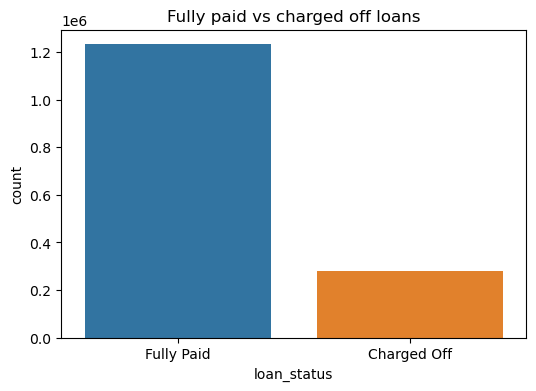

In [46]:
### Check the number of accounts 
fig=plt.figure(figsize=(6,4))
plt.title('Fully paid vs charged off loans')
sns.countplot(x='loan_status', data=dataset3)

[Text(0.5, 0, 'Term'), Text(0, 0.5, 'Number of accounts')]

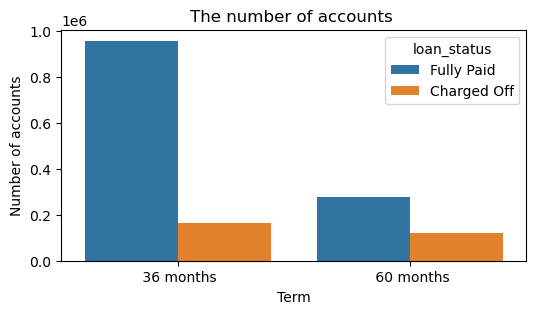

In [67]:
### Loan term 
fig=plt.figure(figsize=(6,3))
plt.title('The number of accounts ')
s=sns.countplot(x='term', data=dataset3, hue='loan_status')
s.set(xlabel='Term', ylabel='Number of accounts')

<Axes: title={'center': 'Number of derogatory public records'}, xlabel='pub_rec', ylabel='loan_status'>

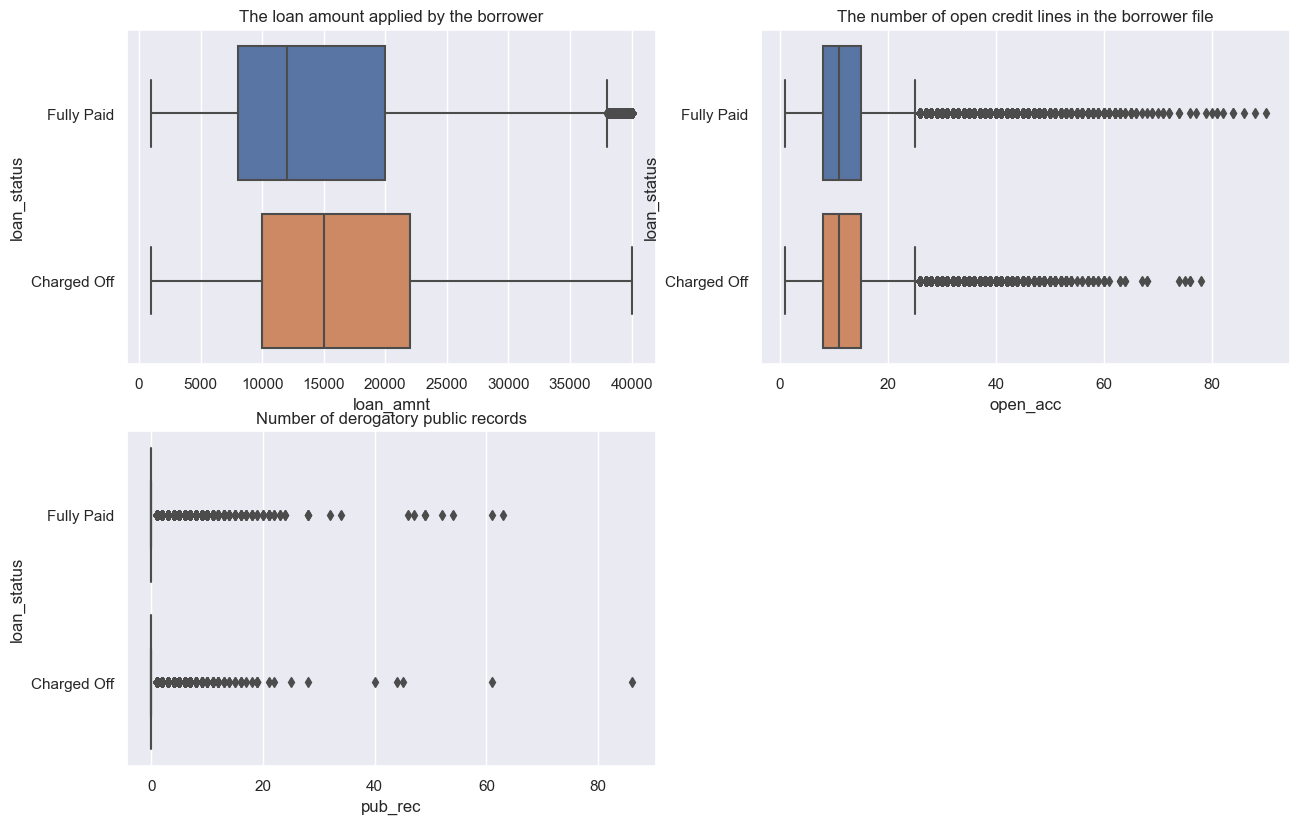

In [94]:

plt.figure(figsize=(15, 20))
### Loan amount difference Fully paid vs. Charged Off
plt.subplot(4, 2, 1, title='The loan amount applied by the borrower')
sns.boxplot(x='loan_amnt', data=dataset3, y='loan_status')

plt.subplot(4, 2, 2, title='The number of open credit lines in the borrower file')
sns.boxplot(x='open_acc', data=dataset3, y='loan_status')

plt.subplot(4, 2, 3, title='Number of derogatory public records')
sns.boxplot(x='pub_rec', data=dataset3, y='loan_status')

[Text(0.5, 0, 'Deliquent accounts'), Text(0, 0.5, 'Number of accounts')]

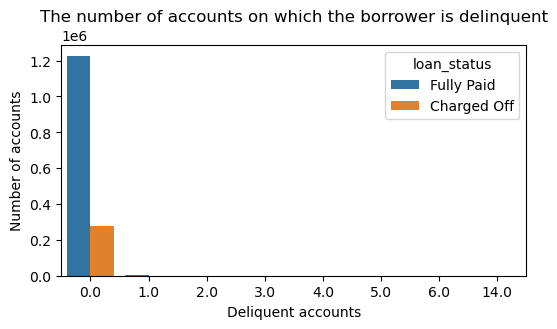

In [20]:
fig=plt.figure(figsize=(6,3))
plt.title('The number of accounts on which the borrower is delinquent')
s=sns.countplot(x='acc_now_delinq', data=dataset3, hue='loan_status')
s.set(xlabel='Deliquent accounts', ylabel='Number of accounts')

In [28]:
### Find most frequent proffesion in dataset
fp_data=dataset3[dataset3['loan_status']=='Fully Paid'].groupby('emp_title')['emp_title'].count().nlargest(10)

choff_data=dataset3[dataset3['loan_status']=='Charged Off'].groupby('emp_title')['emp_title'].count().nlargest(10)
choff_data

emp_title
Manager             5110
Teacher             4855
Owner               3372
Driver              2711
Supervisor          2169
Sales               2041
Registered Nurse    2006
RN                  1912
General Manager     1414
owner               1403
Name: emp_title, dtype: int64

In [33]:
proffesion_df=dataset3[dataset3['emp_title'].isin(['Teacher ','Manager','Owner','RN','Driver','Sales',
                                   'Supervisor','Registered Nurse'])] 

proffesion_df.shape

(93832, 89)

[Text(0, 0.5, 'Employment title'), Text(0.5, 0, 'Number of borrower')]

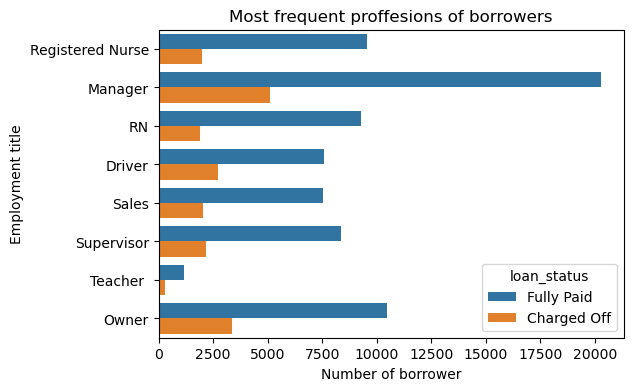

In [61]:
### Find most frequent proffesion of borrowers
fig=plt.figure(figsize=(6,4))
plt.title('Most frequent proffesions of borrowers')
s=sns.countplot(y='emp_title', data=proffesion_df, hue='loan_status')
s.set(ylabel='Employment title', xlabel='Number of borrower')

[Text(0, 0.5, 'Employment years'), Text(0.5, 0, 'Number of borrowers')]

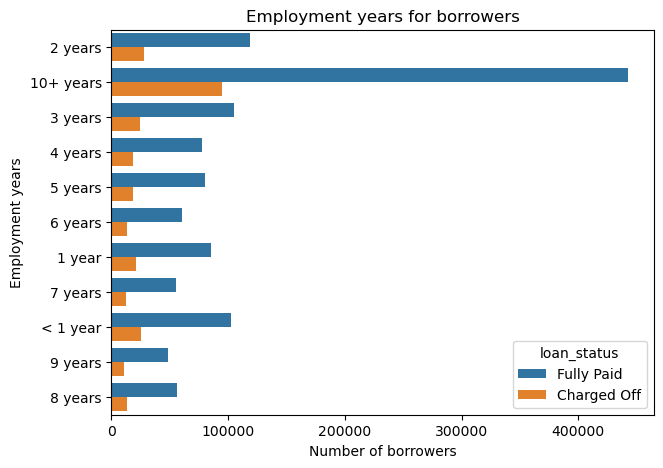

In [62]:
### Employment years for borrowers
fig=plt.figure(figsize=(7,5))
plt.title('Employment years for borrowers')
s=sns.countplot(y='emp_length', data=dataset3, hue='loan_status')
s.set(ylabel='Employment years', xlabel='Number of borrowers')

<Axes: xlabel='loan_year_founded', ylabel='count'>

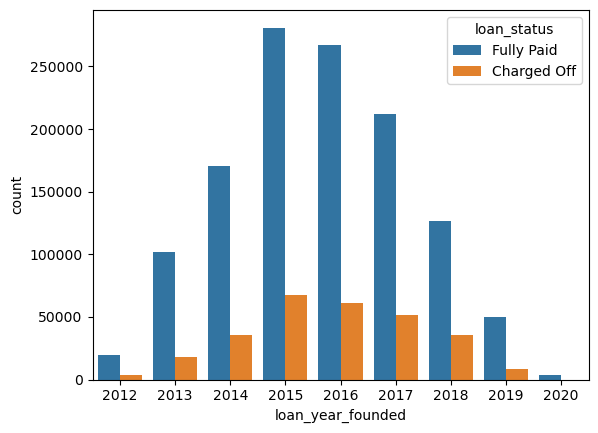

In [73]:
### Distribution of loan lending over years

dataset3['loan_year_founded']=dataset3['issue_d'].str[4:]
dataset3['loan_year_founded']=dataset3['loan_year_founded'].astype('int64')
sns.countplot(x=dataset3['loan_year_founded'] , data=dataset3,  hue='loan_status')

[Text(0, 0.5, 'Number of borrowers')]

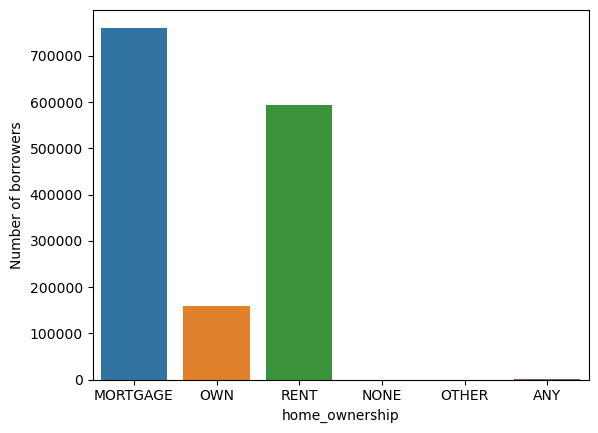

In [75]:
### Home Ownership
e=sns.countplot(x=dataset3['home_ownership'], data=dataset3)
e.set(ylabel='Number of borrowers')

<Axes: xlabel='count', ylabel='purpose'>

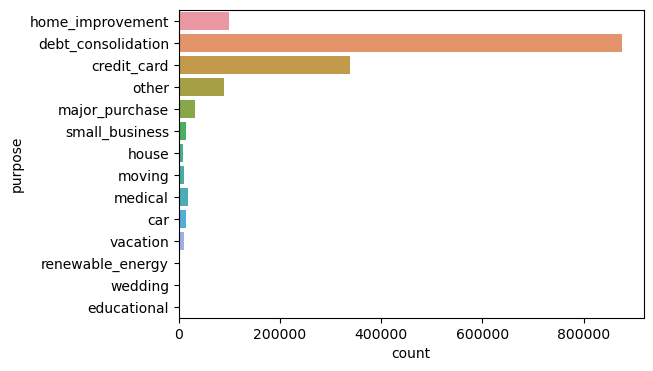

In [71]:
### Purpose of borrower for loans request
fig=plt.figure(figsize=(6,4))
sns.countplot(y=dataset3['purpose'], data=dataset3)

<Axes: xlabel='count', ylabel='addr_state'>

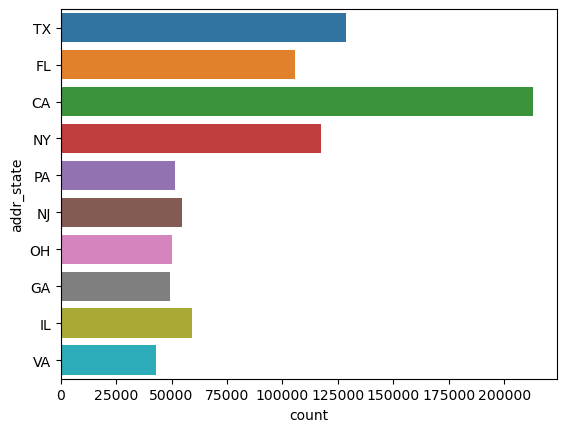

In [84]:
### Countries with the highest number of request loans
top_states=dataset3['addr_state'].value_counts()[:10]

sns.countplot(y='addr_state', data=dataset3[dataset3['addr_state'].isin(top_states.index)])

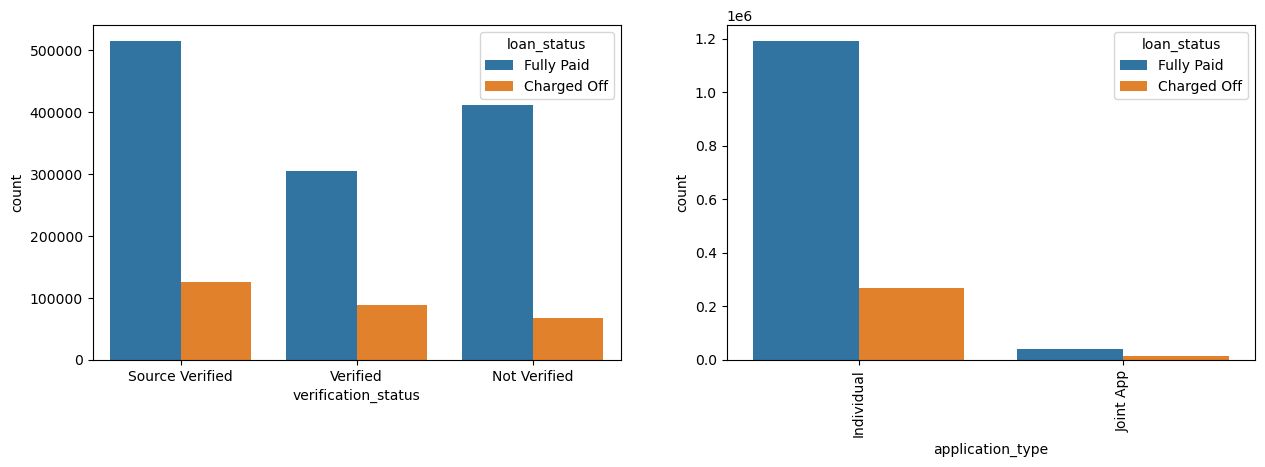

In [80]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=dataset3, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='application_type', data=dataset3, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [29]:
dataset3['loan_status_01'] = dataset3.loan_status.map({'Fully Paid':1, 'Charged Off':0})

df_numerical=dataset3.select_dtypes(include=['float64','int64'])

C:\Users\nelaa\AppData\Local\Temp\ipykernel_10276\475042567.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_corr.corr(),annot=True,


<Axes: >

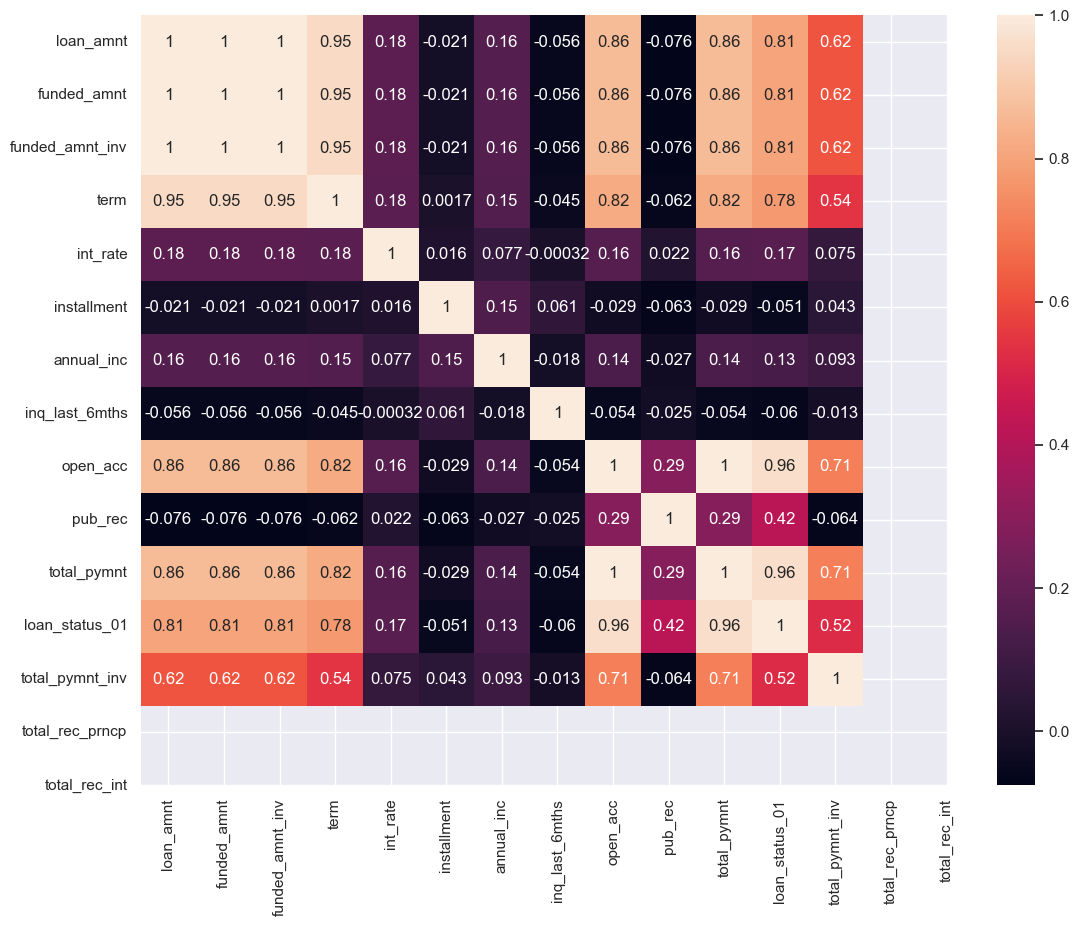

In [89]:
### Correlation matrix for numerical features.

data_corr=dataset3[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_pymnt','loan_status_01',
                    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']]
sns.set (rc = {'figure.figsize':(13, 10)})
sns.heatmap(data_corr.corr(),annot=True,
                xticklabels=data_corr.columns,
                yticklabels=data_corr.columns)

In [141]:
df_numerical.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', '

<Axes: title={'center': 'Feature-correlation (pearson)'}>

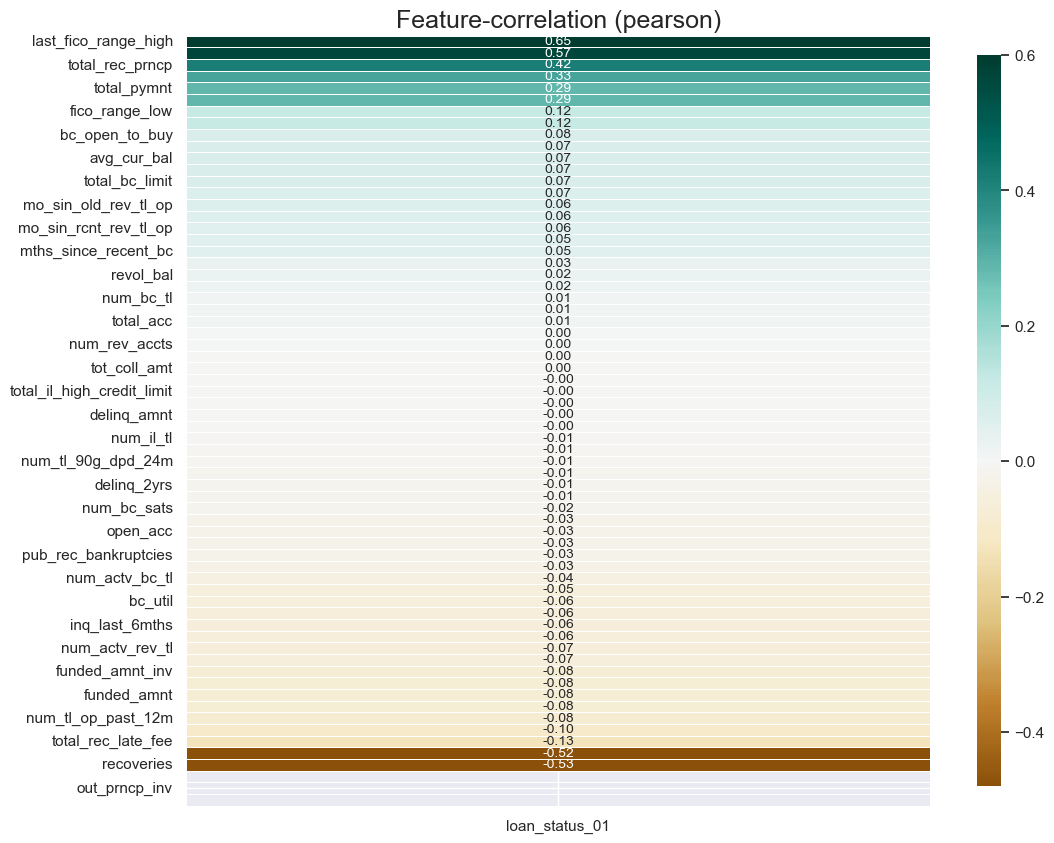

In [145]:
### Check correlation between target and numerical features
klib.corr_plot(df_numerical, target='loan_status_01', method='pearson')

In [3]:
# Remove the percentage sign (%) and divide by 100
dataset3['interest_rate'] = dataset3['int_rate'].str.rstrip('%').astype(float) / 100


#### Modelling 

In [59]:
### Define the input variable and target from dataset

X=dataset3[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'interest_rate',
       'installment',  'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 
        'purpose',   'addr_state', 'dti',
       'delinq_2yrs',  'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
       'total_acc', 'initial_list_status',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_amnt',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med',  'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'hardship_flag', 'debt_settlement_flag']]
Y=dataset3['loan_status']


# Removed columns : 
# emp_title-> no influence on two loan categories fully paid and charged off, 
# title --> multicategory of column purpose
# zip code --> lots of unique values, kept column adress_state
# earliest_cr_line, issue_d, last_pymnt_d, last_credit_pull_d--> date columns, used issued_d to extract only year information
# revol_util--> information leakage, pymnt_plan,out_prncp_inv,out_prncp, policy_code--> constant


In [6]:
# Define columns into categorical and numerical
df_categorical = X.select_dtypes(include='object')
df_numerical=X.select_dtypes(include='float64')

In [7]:
df_numerical.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,interest_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,4800.0,4800.0,4800.0,0.1099,157.13,39600.0,2.49,0.0,755.0,759.0,...,0.0,0.0,100.0,0.0,0.0,0.0,25700.0,4136.0,25700.0,0.0
1,27050.0,27050.0,27050.0,0.1099,885.46,55000.0,22.87,0.0,730.0,734.0,...,0.0,1.0,100.0,25.0,0.0,0.0,138554.0,70186.0,35700.0,33054.0
2,12000.0,12000.0,12000.0,0.0762,373.94,96500.0,12.61,0.0,705.0,709.0,...,0.0,3.0,100.0,100.0,0.0,0.0,233004.0,46738.0,14800.0,53404.0
3,14000.0,14000.0,14000.0,0.1285,470.71,88000.0,10.02,1.0,670.0,674.0,...,0.0,0.0,78.6,100.0,1.0,0.0,31840.0,17672.0,3900.0,27340.0
4,12000.0,12000.0,12000.0,0.0662,368.45,105000.0,14.05,0.0,760.0,764.0,...,0.0,2.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0,42769.0


In [8]:
df_categorical.head(5)

,term,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,36 months,2 years,MORTGAGE,Source Verified,home_improvement,TX,w,Individual,N,N
1,36 months,10+ years,OWN,Verified,debt_consolidation,MI,w,Individual,N,N
2,36 months,3 years,MORTGAGE,Not Verified,debt_consolidation,TX,f,Individual,N,N
3,36 months,4 years,RENT,Not Verified,debt_consolidation,NC,f,Individual,N,N
4,36 months,10+ years,MORTGAGE,Not Verified,debt_consolidation,CT,w,Individual,N,N


In [9]:
## Standartize the numerical input feature

df_numerical_sta=zscore(df_numerical)

In [10]:
# Create one-hot encoding for categorical features 
# categorical values are nominal not ordinal

encoder = OneHotEncoder(sparse=False)
# Transform data
#onehot = encoder.fit_transform(df_categorical)
df_categorical_en = pd.get_dummies(df_categorical,drop_first=True)

In [11]:
df_numerical_sta.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,interest_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-1.125479,-1.125477,-1.125179,-0.437594,-1.091725,-0.345154,-1.530123,-0.36198,1.764713,1.764675,...,-0.166969,-1.170977,0.656286,-1.187501,-0.346525,-0.127927,-0.874471,-0.981084,0.120435,-1.021350
1,1.342742,1.342744,1.343731,-0.437594,1.628260,-0.213374,0.391133,-0.36198,0.995098,0.995075,...,-0.166969,-0.629090,0.656286,-0.494328,-0.346525,-0.127927,-0.247682,0.339605,0.567641,-0.287264
2,-0.326774,-0.326772,-0.326251,-1.132742,-0.282037,0.141747,-0.576094,-0.36198,0.225483,0.225475,...,-0.166969,0.454686,0.656286,1.585192,-0.346525,-0.127927,0.276892,-0.129245,-0.367020,0.164683
3,-0.104911,-0.104909,-0.104326,-0.053921,0.079356,0.069011,-0.820257,0.76892,-0.851978,-0.851965,...,-0.166969,-1.170977,-1.791947,1.585192,2.359516,-0.127927,-0.840369,-0.710428,-0.854475,-0.414164
4,-0.326774,-0.326772,-0.326251,-1.339018,-0.302540,0.214483,-0.440343,-0.36198,1.918636,1.918595,...,-0.166969,-0.087202,0.141471,-1.187501,-0.346525,-0.127927,0.832512,-0.211926,1.323419,-0.071506


In [12]:
df_categorical_en.shape


(1513603, 85)

In [13]:
# Concatenate two dataframes 
df_allfeatures=pd.concat((df_numerical_sta, df_categorical_en), axis=1)

In [14]:
df_allfeatures.shape

(1513603, 149)

In [60]:
X_train, X_test, Y_train, Y_test= train_test_split(df_allfeatures, Y, test_size=0.25)

In [16]:
### Naive Bayes CLassifier
#Assumptions: indipendent input features and variables are normally distributed.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)


Accuracy of the classifier is: 95.30154518619138
              precision    recall  f1-score   support

 Charged Off       0.94      0.80      0.86     70334
  Fully Paid       0.96      0.99      0.97    308067

    accuracy                           0.95    378401
   macro avg       0.95      0.89      0.92    378401
weighted avg       0.95      0.95      0.95    378401

[[ 55996  14338]
 [  3441 304626]]


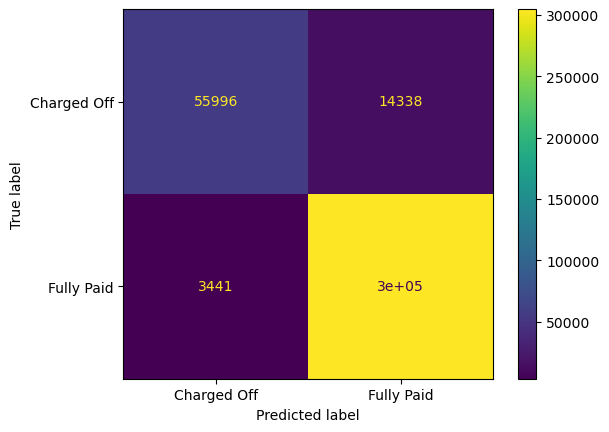

In [17]:
### Evaluate the Naive Bayes model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report
 
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(Y_test, y_pred)*100}")
print(classification_report(Y_test, y_pred))
# confusion_matrix funnction a matrix containing the summary of predictions
cm=confusion_matrix(Y_test, y_pred)
print(cm)

# plot_confusion_matrix function is used to visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()


In [ ]:
# RF.1) I will try another classification model Random Forest model to improve accuracy and f1 score with this model
#(to handle the imbalance)

clf_rforest=RandomForestClassifier()
clf_rforest.fit(X_train, Y_train)
y_pred_rforest = clf_rforest.predict(X_test)

# Execution time for random forest algorithm >20 min

In [ ]:
# RF.2) Evaluate the Random Forest model
# Calculating the accuracy of classifier

print(f"Accuracy of the classifier is: {accuracy_score(Y_test, y_pred_rforest)*100}")
print(classification_report(Y_test, y_pred_rforest))
# confusion_matrix funnction a matrix containing the summary of predictions
cm_rf=confusion_matrix(Y_test, y_pred_rforest)
print(cm_rf)

# plot_confusion_matrix function is used to visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=clf_rforest.classes_)
disp.plot()


In [35]:
# RF.3) Feature Selection for Random Forest model


feature_importance_df=pd.DataFrame(clf_rforest.feature_importances_, columns=['Score'],index=df_allfeatures.columns).sort_values(by='Score', ascending=False)
feature_importance_df

feature_importance_df_20=feature_importance_df.iloc[0:20,:]

<Axes: xlabel='Score'>

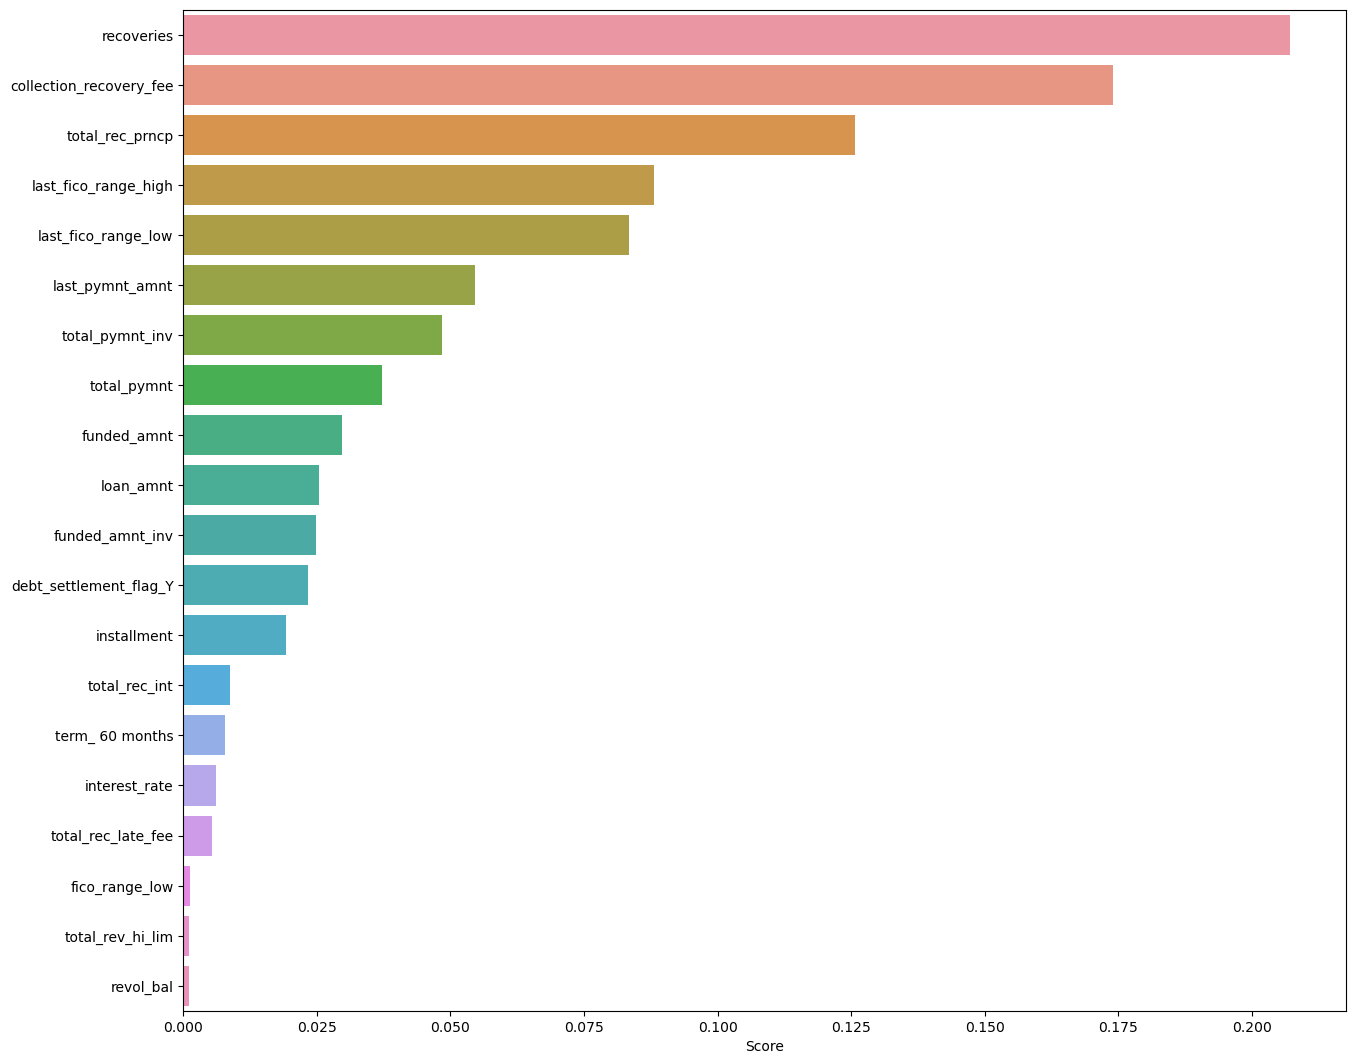

In [37]:
# Select featues with high impact on target variable
plt.figure(figsize=(15,13))
sns.barplot(y=feature_importance_df_20.index, x=feature_importance_df_20['Score'])

In [141]:

feature_importance=df_allfeatures[feature_importance_df_20.index]   
X1_train, X1_test, Y1_train, Y1_test= train_test_split(feature_importance, Y, test_size=0.25)

In [ ]:
#Train the model with 20 input features
clf_rforest1=RandomForestClassifier(n_estimators=5)
clf_rforest1.fit(X1_train, Y1_train)
y_pred_rforest1 = clf_rforest1.predict(X1_test)

Accuracy of the classifier is: 99.90750552984797
              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00     69922
  Fully Paid       1.00      1.00      1.00    308479

    accuracy                           1.00    378401
   macro avg       1.00      1.00      1.00    378401
weighted avg       1.00      1.00      1.00    378401

[[ 69588    334]
 [    16 308463]]


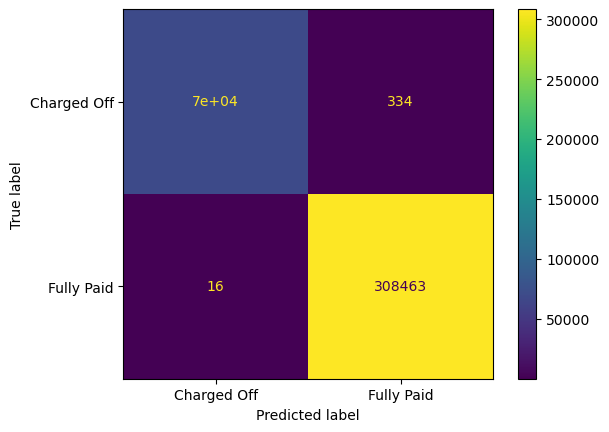

In [138]:
# RF.4) Evaluate the Random Forest model after selection 20 input features with higest score
# Calculating the accuracy of classifier

print(f"Accuracy of the classifier is: {accuracy_score(Y1_test, y_pred_rforest1)*100}")
print(classification_report(Y1_test, y_pred_rforest1))
# confusion_matrix funnction a matrix containing the summary of predictions
cm_rf1=confusion_matrix(Y1_test, y_pred_rforest1)
print(cm_rf1)

# plot_confusion_matrix function is used to visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf1, display_labels=clf_rforest1.classes_)
disp.plot()


# From the confusion matrix we see the number of false positives have decresed, f1-score=1

In [139]:
# Explain (as in “explainability”) your model in terms of the classifier’s features 
# Explainability of Random Forest model  ( for simplicity n_estimator or trees=5 ).

clf_rforest1.estimators_  # The random forest model is composed of 100 trees (DecisionTreeClassifier(max_features='sqrt', random_state=533359031)

[DecisionTreeClassifier(max_features='sqrt', random_state=1752969276),
 DecisionTreeClassifier(max_features='sqrt', random_state=1275893593),
 DecisionTreeClassifier(max_features='sqrt', random_state=1330117705),
 DecisionTreeClassifier(max_features='sqrt', random_state=1851952608),
 DecisionTreeClassifier(max_features='sqrt', random_state=359420159)]

In [140]:
# The decision rules for each of five trees below and the feature importance

# Define the maximum number of decision rules and important features to display because of execution time
max_decision_rules = 5
max_important_features = 5

# Iterate over each decision tree in the random forest
for tree_index, tree in enumerate(clf_rforest1.estimators_):
    print(f"Decision Tree {tree_index+1} decision rules:")
    
    # Define a recursive function to extract decision rules from the tree
    def extract_decision_rules(node, depth=0, decision_rule=[]):
        if len(decision_rule) >= max_decision_rules:
            return
        
        feature = tree.tree_.feature[node]
        
        if feature != -2:
            threshold = tree.tree_.threshold[node]
            feature_name = f"Feature {feature}"
            
            # Append the decision rule
            decision_rule.append(f"{feature_name} <= {threshold}")
            
            # Recursively process the left child node
            extract_decision_rules(tree.tree_.children_left[node], depth + 1, decision_rule)
            
            # Modify the decision rule for the right child node
            decision_rule[depth] = f"{feature_name} > {threshold}"
            
            # Recursively process the right child node
            extract_decision_rules(tree.tree_.children_right[node], depth + 1, decision_rule)
            
            # Remove the decision rule for the current depth
            decision_rule.pop(depth)
        else:
            # Reached a leaf node, print the decision rule
            print(' AND '.join(decision_rule))
    
    # Extract decision rules from the decision tree
    extract_decision_rules(0)  # Start with the root node
    
    # Retrieve feature importances for the tree
    importances = tree.feature_importances_
    
    # Sort feature importances in descending order
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]
    
    # Gather the corresponding feature names
    feature_names = [f"Feature {i}" for i in sorted_indices]
    
    print(f"Variables with impact in decision:")
    for i in range(min(max_important_features, len(feature_names))):
        print(f"{feature_names[i]}: {sorted_importances[i]}")
    
    print('---')


Decision Tree 1 decision rules:
Feature 1 <= -0.24747063219547272 AND Feature 2 <= -1.070521593093872 AND Feature 8 <= -1.326540231704712 AND Feature 2 <= -1.289097547531128
Feature 1 <= -0.24747063219547272 AND Feature 2 <= -1.070521593093872 AND Feature 8 > -1.326540231704712
Feature 1 <= -0.24747063219547272 AND Feature 2 > -1.070521593093872 AND Feature 11 > 0.5 AND Feature 10 <= -1.2416889667510986
Feature 1 > -0.24747063219547272
Variables with impact in decision:
Feature 1: 0.6810008551262646
Feature 8: 0.11679314953597279
Feature 2: 0.08659916107541561
Feature 4: 0.031413316516642885
Feature 7: 0.02333873254577954
---
Decision Tree 2 decision rules:
Feature 4 <= -0.3208962380886078 AND Feature 1 > -0.24737901985645294
Feature 4 > -0.3208962380886078 AND Feature 1 <= -0.24743205308914185 AND Feature 7 <= -1.3607378005981445
Feature 4 > -0.3208962380886078 AND Feature 1 <= -0.24743205308914185 AND Feature 7 > -1.3607378005981445 AND Feature 0 > -0.2550039440393448
Feature 4 > -0.

In [113]:
# Extract the decision path 
decision_paths = clf_rforest1.decision_path([feature_importance.loc[0]])
decision_paths

C:\Users\nelaa\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(<1x437782 sparse matrix of type '<class 'numpy.int64'>'
 	with 1416 stored elements in Compressed Sparse Row format>,
 array([     0,   4321,   8170,  13279,  17190,  21421,  25962,  30501,
         34788,  39117,  43662,  48705,  52662,  56409,  60822,  65059,
         69358,  73333,  77628,  82455,  86224,  90617,  94862,  99687,
        104498, 108595, 112232, 116349, 121234, 125919, 130008, 134803,
        138958, 143331, 147578, 151783, 155734, 159781, 163582, 168825,
        172992, 178459, 182448, 186977, 191228, 196937, 200608, 205309,
        208626, 213153, 217450, 221751, 226144, 229589, 233618, 237621,
        241768, 245377, 249984, 254201, 258496, 261873, 266028, 269937,
        274740, 279125, 283348, 287331, 291262, 296951, 300956, 305435,
        310414, 314865, 319016, 323063, 327768, 331531, 336180, 342283,
        346382, 350759, 355546, 360177, 364228, 368815, 373702, 377761,
        382614, 386597, 391576, 396235, 400626, 405195, 409194, 414159,
        419148, 4

In [122]:
# Retrieve the indices of the trees that contribute to the decision path

# Extract the decision path for the sample
decision_paths = clf_rforest1.estimators_[0].decision_path([feature_importance.loc[0]])
tree = clf_rforest1.estimators_[0].tree_
tree

In [92]:
### RF.4) Tuning the Random Forest model

# Number of trees in random forest
#n_estimators = np.linspace(5, 10,  3, dtype=int)
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [1, 5, 10]
# Minimum number of samples required to split a node
#min_samples_split = [1, 2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Criterion
#criterion=['gini', 'entropy']
#random_grid = {'n_estimators': n_estimators,
 #              'max_features': max_features,
 #             'max_depth': max_depth,
  #            'min_samples_split': min_samples_split,
 #           'min_samples_leaf': min_samples_leaf,
 #          'bootstrap': bootstrap,
#         'criterion': criterion}

#clf_rforest=RandomForestClassifier()
#grid=GridSearchCV(estimator=clf_rforest, param_grid=random_grid, cv=3)
#grid.fit(X_train, Y_train)

#print("The best parameters are %s with a score of %0.2f"
 #    %(grid.best_params_, grid.best_score_))

In [82]:
#The target for the NN needs to convert to numeric value
Y2=dataset3['loan_status_01'].astype(np.float32)

#Split train & test
X2_train, X2_test, Y2_train, Y2_test= train_test_split(df_allfeatures, Y2, test_size=0.25)

Y2_test= np.array(Y2_test).astype(np.float32)

In [72]:
### 3.Build a neural network
import keras
# Import python libraries required in this example:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Build the neural network. 

model = Sequential()
model.add(Dense(149))
model.add(Activation('relu'))
model.add(Dense(20))
model.add(Activation('relu')) 
model.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
#Binary cross-entropy is well-suited for binary classification tasks where the goal is to predict one of two classes.
learning_rate = 0.001  
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"]) #binary output


# fit the keras model on the dataset
model.fit(X2_train, Y2_train, epochs=3, batch_size=10)
y_pred_nn = model.predict(X2_test)
# Print a summary of the Keras model:
model.summary()

Epoch 1/3
113521/113521 [==============================] - 263s 2ms/step - loss: 0.0137 - accuracy: 0.9961
Epoch 2/3
113521/113521 [==============================] - 261s 2ms/step - loss: 0.0090 - accuracy: 0.9976
Epoch 3/3
11826/11826 [==============================] - 22s 2ms/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 149)               22350     
                                                                 
 activation_26 (Activation)  (None, 149)               0         
                                                                 
 dense_40 (Dense)            (None, 20)                3000      
                                                                 
 activation_27 (Activation)  (None, 20)                0         
                                                                 
 dense_41 (Dense)            (Non

Accuracy of the NN classifier is: 69.79685571655466
              precision    recall  f1-score   support

         0.0       0.19      0.19      0.19     70250
         1.0       0.81      0.81      0.81    308151

    accuracy                           0.70    378401
   macro avg       0.50      0.50      0.50    378401
weighted avg       0.70      0.70      0.70    378401

[[ 13119  57131]
 [ 57158 250993]]


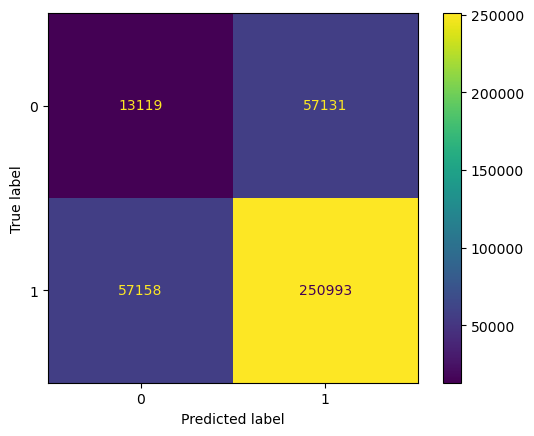

In [90]:
### Evaluate the Neural Network model


print(f"Accuracy of the NN classifier is: {accuracy_score(Y2_test, np.round(y_pred_nn))*100}")
print(classification_report(Y2_test, np.round(y_pred_nn)))
# confusion_matrix funnction a matrix containing the summary of predictions
cm_nn=confusion_matrix(Y2_test, np.round(y_pred_nn))
print(cm_nn)

# plot_confusion_matrix function is used to visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()

### The performance of neural network is not high compared to Random forest

In [ ]:
#5. Discuss additional steps you would take if you had more time or resources, and any
#other datasets you could use to enrich your original dataset.

Even though the performance of Random Forest model is higher than 99%, If I had more time and resource I would experiment with:
    Feature Engineer --combination of several input featues into one, (feature cross) help reduce the number and increase efficiency and reduce execution time
                     --use kmodes method to cluster features with huge unique categorical values
                     --hyperparameters tunning for models
                     
                
    More data -- Add demographic data such as (gender, age, civil status, origin)
              -- Analyse further the impact that customer financial behaviour and demographic data have on loan status.
    


In [ ]:
#a. Scalability in terms of the number of loans/rows in the training data:
#Random forests models can efficiently process large amounts of data. They can handle datasets with thousands to millions of rows without a significant impact on performance. The training time may increase with larger datasets.
#To further enhance scalability, we can consider distributing the training process across multiple machines or using parallel processing techniques. 
#Distributed computing frameworks like Google Cloud Kubernetes (GKE) can help scale the training process by distributing the workload across a cluster of machines.

In [160]:
#from flask import Flask
#app = Flask(__name__)

#@app.route('/')

 

#if __name__ == '__main__':
 #   app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
